In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc

import matplotlib.pylab as plt
plt.style.use("ggplot") 

from sklearn.manifold import TSNE
from wordcloud import WordCloud
from scipy.sparse import csr_matrix
import json

import sys
sys.setrecursionlimit(10000)

import data_helpers
import data_titles_helpers
from data_helpers import *
from data_titles_helpers import *
import imp
imp.reload(data_helpers)
imp.reload(data_titles_helpers)

<module 'data_titles_helpers' from '/Users/kyrylo/Projects/personal/thesis/data_titles_helpers.py'>

# Openings

In [2]:
df_openings = pd.read_csv(NEW_OPENINGS_PATH)
df_se_skills = pd.read_csv(PREPROCESSED_SE_SKILLS_PATH)
df_countries = pd.read_csv(PREPROCESSED_COUNTRIES_PATH)
df_specialities = pd.read_csv(PREPROCESSED_SPECIALITIES_PATH)
df_openings.describe(include='all')

ID                COUNTRY_ID SKILLS  \
count                      10529                     10529  10529   
unique                     10529                        57   8588   
top     cc4dc2c04cea44af1cdc6ae5  b8214d929b3ec7b0548c1ac5     []   
freq                           1                      3851    197   
mean                         NaN                       NaN    NaN   
std                          NaN                       NaN    NaN   
min                          NaN                       NaN    NaN   
25%                          NaN                       NaN    NaN   
50%                          NaN                       NaN    NaN   
75%                          NaN                       NaN    NaN   
max                          NaN                       NaN    NaN   

                   SPECIALITY_ID           TITLE     SENIORITY  
count                      10529           10222  10529.000000  
unique                         3            4799           NaN  
top     ef2aa0915a3bf179755b8915  Java Developer           NaN  
freq                        8563             143           NaN  
mean                         NaN             NaN      2.463007  
std                          NaN             NaN      0.765781  
min                          NaN             NaN      0.000000  
25%                          NaN             NaN      2.000000  
50%                          NaN             NaN      3.000000  
75%                          NaN             NaN      3.000000  
max                          NaN             NaN      3.000000

# Software engineers (SE) openings

In [3]:
# ML_SPECIALITY_ID
df_se_openings = df_openings[df_openings[OPENING_SPECIALITY_ID_LABEL].apply(lambda id: id in [SE_SPECIALITY_ID])].copy()
df_se_openings = df_se_openings[[OPENING_ID_LABEL, OPENING_COUNTRY_ID_LABEL, OPENING_TITLE_LABEL, OPENING_SKILLS_LABEL, OPENING_SPECIALITY_ID_LABEL, OPENING_SENIORITY_LABEL]]
df_se_openings.drop(df_se_openings[df_se_openings[OPENING_SKILLS_LABEL] == '[]'].index, inplace=True)
df_se_openings.drop_duplicates(subset=[OPENING_ID_LABEL], keep='last', inplace=True)
df_se_openings.reset_index(drop=True, inplace=True)
df_se_openings.describe(include='all')

ID                COUNTRY_ID           TITLE  \
count                       8437                      8437            8226   
unique                      8437                        50            3739   
top     f9be2e9251b8302fc4781cf5  b8214d929b3ec7b0548c1ac5  Java Developer   
freq                           1                      2999             140   
mean                         NaN                       NaN             NaN   
std                          NaN                       NaN             NaN   
min                          NaN                       NaN             NaN   
25%                          NaN                       NaN             NaN   
50%                          NaN                       NaN             NaN   
75%                          NaN                       NaN             NaN   
max                          NaN                       NaN             NaN   

                                                   SKILLS  \
count                                                8437   
unique                                               6949   
top     [{"skillId":"06fcb2c5fb939f4855b3c9b5","isMand...   
freq                                                   44   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                   SPECIALITY_ID    SENIORITY  
count                       8437  8437.000000  
unique                         1          NaN  
top     ef2aa0915a3bf179755b8915          NaN  
freq                        8437          NaN  
mean                         NaN     2.492711  
std                          NaN     0.733019  
min                          NaN     0.000000  
25%                          NaN     2.000000  
50%                          NaN     3.000000  
75%                          NaN     3.000000  
max                          NaN     3.000000

## Filter by seniority

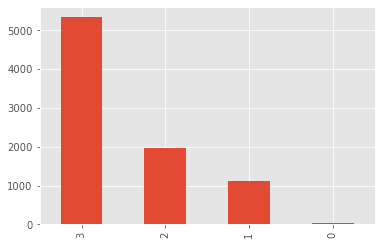

Restored results:
0    22
3    11
1     1
Name: TITLE, dtype: int64


<AxesSubplot:>

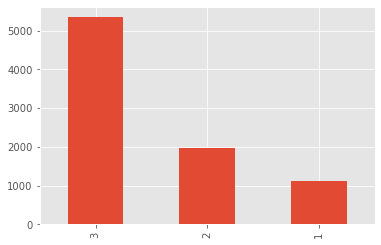

In [4]:
df_se_openings[OPENING_SENIORITY_LABEL].value_counts().plot(kind='bar')
plt.show()

df_se_openings = restore_seniority_from_title(df_se_openings, OPENING_SENIORITY_LABEL, OPENING_TITLE_LABEL, 2)

df_se_openings[OPENING_SENIORITY_LABEL].value_counts().plot(kind='bar')

## Filter by speciality

<AxesSubplot:>

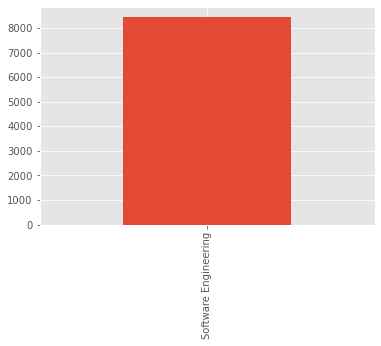

In [5]:
df_se_openings[SPECIALITY_NAME_LABEL] = df_se_openings.apply(lambda row: get_speciality_name_by_id(row[OPENING_SPECIALITY_ID_LABEL], df_specialities), axis=1)
df_se_openings.drop(columns=[OPENING_SPECIALITY_ID_LABEL], inplace=True)

df_se_openings[SPECIALITY_NAME_LABEL].value_counts().plot(kind='bar')

## Filter by country

In [6]:
top_countries_ids = [id for id in df_se_openings[OPENING_COUNTRY_ID_LABEL].value_counts()[df_se_openings[OPENING_COUNTRY_ID_LABEL].value_counts() > MIN_NUMBER_OF_OPENINGS_IN_COUNTRY].index] 
top_countries = [get_country_code_by_id(id, df_countries) for id in top_countries_ids]
top_countries

['EE', 'LT', 'FI', 'LV', 'DE']

<AxesSubplot:>

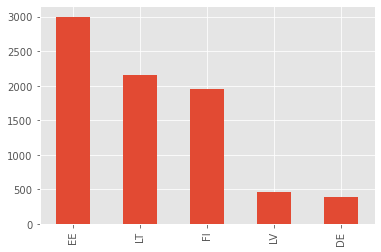

In [7]:
df_se_openings = df_se_openings[df_se_openings[OPENING_COUNTRY_ID_LABEL].isin(top_countries_ids)].copy()
df_se_openings[OPENING_COUNTRY_CODE_LABEL] = df_se_openings[OPENING_COUNTRY_ID_LABEL].apply(lambda country_id: get_country_code_by_id(country_id, df_countries))
df_se_openings.drop(columns=[OPENING_COUNTRY_ID_LABEL], inplace=True)
df_se_openings.reset_index(drop=True, inplace=True)

df_se_openings[OPENING_COUNTRY_CODE_LABEL].value_counts().plot(kind='bar')

In [8]:
df_se_openings.describe(include='all')

ID           TITLE  \
count                       7947            7765   
unique                      7947            3526   
top     f9be2e9251b8302fc4781cf5  Java Developer   
freq                           1             136   
mean                         NaN             NaN   
std                          NaN             NaN   
min                          NaN             NaN   
25%                          NaN             NaN   
50%                          NaN             NaN   
75%                          NaN             NaN   
max                          NaN             NaN   

                                                   SKILLS    SENIORITY  \
count                                                7947  7947.000000   
unique                                               6526          NaN   
top     [{"skillId":"06fcb2c5fb939f4855b3c9b5","isMand...          NaN   
freq                                                   44          NaN   
mean                                                  NaN     2.500440   
std                                                   NaN     0.717859   
min                                                   NaN     1.000000   
25%                                                   NaN     2.000000   
50%                                                   NaN     3.000000   
75%                                                   NaN     3.000000   
max                                                   NaN     3.000000   

             SPECIALITY_NAME COUNTRY_CODE  
count                   7947         7947  
unique                     1            5  
top     Software Engineering           EE  
freq                    7947         2999  
mean                     NaN          NaN  
std                      NaN          NaN  
min                      NaN          NaN  
25%                      NaN          NaN  
50%                      NaN          NaN  
75%                      NaN          NaN  
max                      NaN          NaN

## Filter by number skills in opening

In [9]:
df_se_openings_skills = get_opening_skills_df(df_se_openings, df_se_skills)
df_se_openings.drop(columns=[OPENING_SKILLS_LABEL], inplace=True, errors='ignore')

df_se_openings_skills[SKILL_OPENING_ID_LABEL] = [get_opening_id_by_index(index, df_se_openings) for index in df_se_openings_skills.index]
df_se_openings_skills.set_index(SKILL_OPENING_ID_LABEL, inplace=True)

df_se_openings_skills_real_names = df_se_openings_skills.copy()
df_se_openings_skills_real_names.columns = [get_skill_name_by_index(index, df_se_skills) for index in df_se_openings_skills.columns]

df_se_openings_skills.columns = [get_skill_tag_by_index(index, df_se_skills) for index in df_se_openings_skills.columns]

df_se_openings_skills

programming_language__abap  \
OPENING_ID                                             
384f456150a52e6ad9e28ba5                           0   
8dca9db1f1b99fe904132b15                           0   
8c8c0b8163e2ab7adfe25b55                           0   
40e90fa360db4c7ed896abd5                           0   
5421a001511f8c1b8e32abd5                           0   
...                                              ...   
b19af62017b6b36ea5b03ff5                           0   
4ee295210002395f262f3ff5                           0   
552b81edf2bc77bf5542ef95                           0   
dc00042100a3628f746d5f65                           0   
b512af3031025ea097ad4086                           0   

                          programming_language__bash  \
OPENING_ID                                             
384f456150a52e6ad9e28ba5                           0   
8dca9db1f1b99fe904132b15                           0   
8c8c0b8163e2ab7adfe25b55                           0   
40e90fa360db4c7ed896abd5                           0   
5421a001511f8c1b8e32abd5                           0   
...                                              ...   
b19af62017b6b36ea5b03ff5                           0   
4ee295210002395f262f3ff5                           0   
552b81edf2bc77bf5542ef95                           0   
dc00042100a3628f746d5f65                           0   
b512af3031025ea097ad4086                           0   

                          programming_language__c_cpp  \
OPENING_ID                                              
384f456150a52e6ad9e28ba5                            1   
8dca9db1f1b99fe904132b15                            1   
8c8c0b8163e2ab7adfe25b55                            0   
40e90fa360db4c7ed896abd5                            0   
5421a001511f8c1b8e32abd5                            0   
...                                               ...   
b19af62017b6b36ea5b03ff5                            0   
4ee295210002395f262f3ff5                            0   
552b81edf2bc77bf5542ef95                            0   
dc00042100a3628f746d5f65                            0   
b512af3031025ea097ad4086                            0   

                          programming_language__clojure  \
OPENING_ID                                                
384f456150a52e6ad9e28ba5                              0   
8dca9db1f1b99fe904132b15                              0   
8c8c0b8163e2ab7adfe25b55                              0   
40e90fa360db4c7ed896abd5                              0   
5421a001511f8c1b8e32abd5                              0   
...                                                 ...   
b19af62017b6b36ea5b03ff5                              0   
4ee295210002395f262f3ff5                              0   
552b81edf2bc77bf5542ef95                              0   
dc00042100a3628f746d5f65                              0   
b512af3031025ea097ad4086                              0   

                          programming_language__csharp  \
OPENING_ID                                               
384f456150a52e6ad9e28ba5                             1   
8dca9db1f1b99fe904132b15                             0   
8c8c0b8163e2ab7adfe25b55                             0   
40e90fa360db4c7ed896abd5                             0   
5421a001511f8c1b8e32abd5                             0   
...                                                ...   
b19af62017b6b36ea5b03ff5                             0   
4ee295210002395f262f3ff5                             0   
552b81edf2bc77bf5542ef95                             0   
dc00042100a3628f746d5f65                             0   
b512af3031025ea097ad4086                             0   

                          programming_language__dart  \
OPENING_ID                                             
384f456150a52e6ad9e28ba5                           0   
8dca9db1f1b99fe904132b15                           0   
8c8c0b8163e2ab7adfe25b55                           0   
40e90fa360db4c7ed896abd

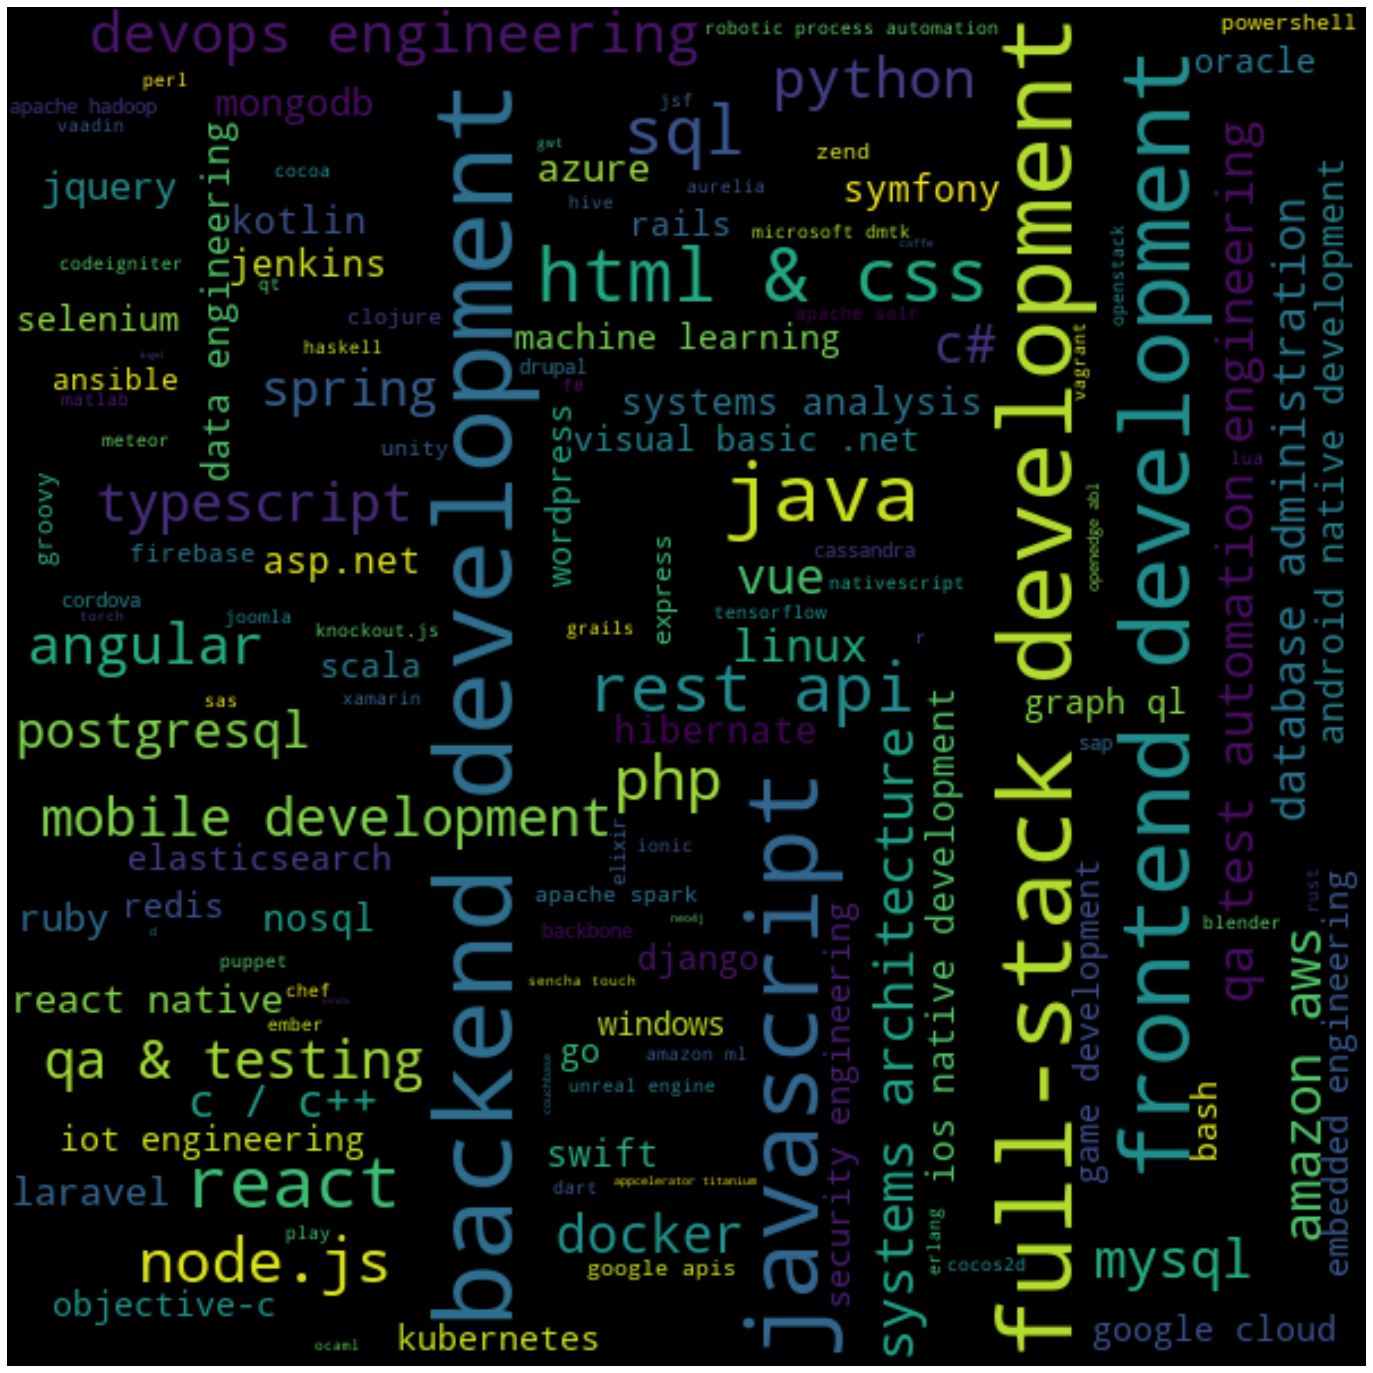

In [10]:
wc = WordCloud(width=600, height=600).generate_from_frequencies(df_se_openings_skills_real_names.sum())
plt.figure(figsize=(25, 25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

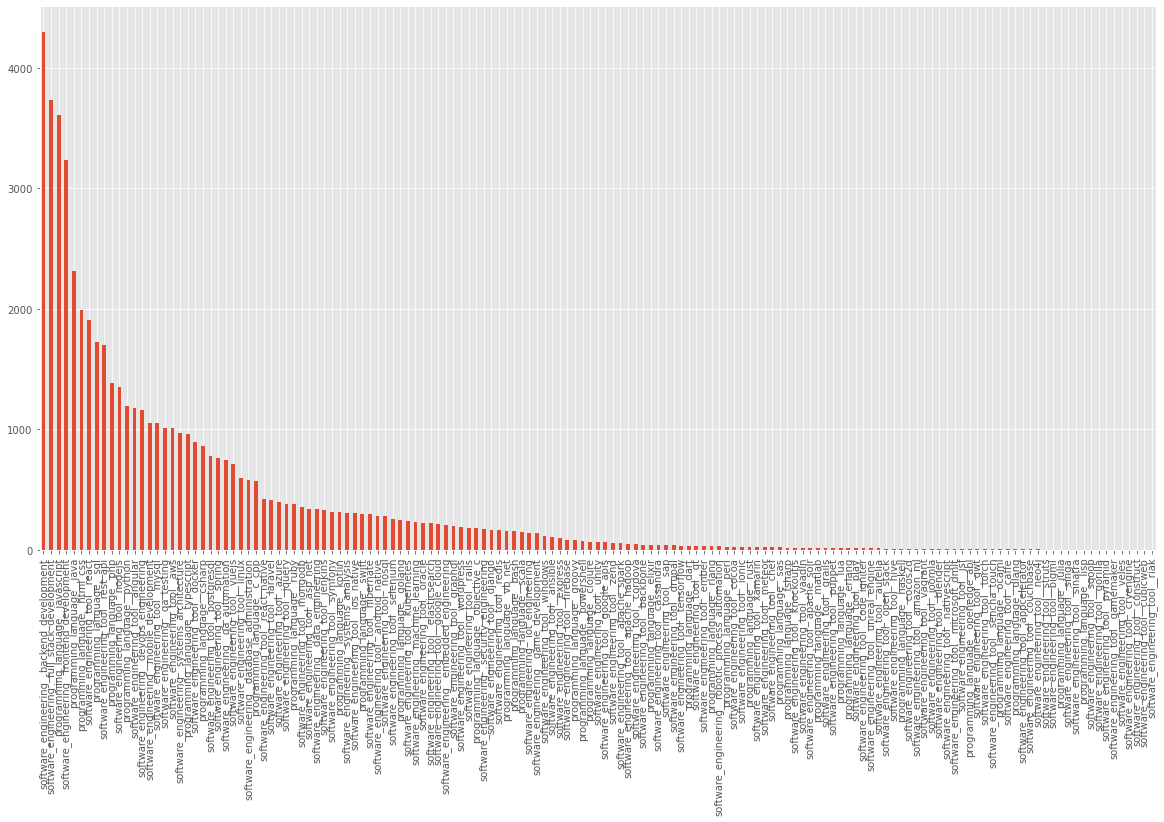

In [11]:
plot_top_skills(df_se_openings_skills, df_se_skills, skill_label=SKILL_TAG_LABEL, n=df_se_openings_skills.shape[1])

In [12]:
df_se_openings_skills = df_se_openings_skills.loc[(df_se_openings_skills.sum(axis=1) != 0), (df_se_openings_skills.sum(axis=0) != 0)]

In [13]:
print('SE Openings shape:', df_se_openings.shape)
print('SE Openings skills shape:', df_se_openings_skills.shape)

SE Openings shape: (7947, 5)
SE Openings skills shape: (7880, 147)


## Output

In [14]:
df_se_openings_skills_out = df_se_openings_skills.copy()
df_se_openings_out = df_se_openings.copy()

df_se_openings_out.set_index(OPENING_ID_LABEL, inplace=True)
df_se_openings_out = pd.concat([df_se_openings_skills, df_se_openings_out], axis=1).dropna()
df_se_openings_out.index.name = OPENING_ID_LABEL

df_se_openings_out.to_csv(PREPROCESSED_SE_OPENINGS_PATH)
df_se_openings_skills_out.to_csv(PREPROCESSED_SE_OPENINGS_SKILLS_PATH)

play_sound()